In [1]:
import sklearn
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [2]:
ground_truth_path = r"D:/deepfakes/data/test/labels.csv"

In [3]:
results = r"D:/deepfakes/inference/final_efficient_net4.csv"

In [4]:
target_names = ["REAL", "FAKE"]

In [5]:
results = pd.read_csv(results)

In [6]:
results

,filename,label
0,4000.mp4,0.990000
1,4001.mp4,0.990000
2,4002.mp4,0.990000
3,4003.mp4,0.569241
4,4004.mp4,0.017729
...,...,...
3995,7995.mp4,0.063486
3996,7996.mp4,0.070172
3997,7997.mp4,0.022141
3998,7998.mp4,0.951619


In [7]:
# ids = [x for x in range(4000, 8000)]
# efficient_net_ids = [int(x[:-4]) for x in results.filename]
# missing = np.setdiff1d(ids, efficient_net_ids)
# missing

## Prepare Data for evaluation

In [8]:
ground_truth = pd.read_csv(ground_truth_path)

In [9]:
ground_truth

,filename,label
0,4000.mp4,1
1,4001.mp4,1
2,4002.mp4,1
3,4003.mp4,0
4,4004.mp4,0
...,...,...
3995,7995.mp4,0
3996,7996.mp4,0
3997,7997.mp4,0
3998,7998.mp4,1


In [10]:
truth_labels = ground_truth["label"].values

In [11]:
len(truth_labels)

4000

In [12]:
predicted_labels = results["label"].values

In [13]:
len(predicted_labels)

4000

# Loss

In [21]:
from sklearn.metrics import log_loss

In [22]:
loss = log_loss(truth_labels, predicted_labels)

In [24]:
loss

0.4210448277052976

# Average Precision

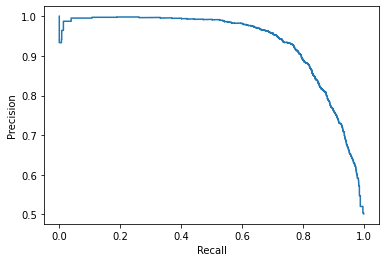

In [23]:
from sklearn.metrics import average_precision_score, precision_recall_curve, PrecisionRecallDisplay, auc, roc_curve

average_precision = average_precision_score(truth_labels, predicted_labels)
precision, recall, _ = precision_recall_curve(truth_labels, predicted_labels)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()


In [24]:
area = auc(recall, precision)
area

0.9346960953172803

In [25]:
sum(precision) / len(precision)

0.8237739183156703

In [26]:
average_precision

0.935039645214771

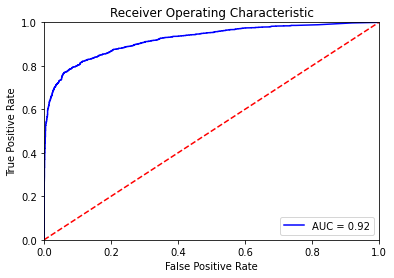

In [36]:
fpr, tpr, threshold = roc_curve(truth_labels, predicted_labels)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Plotting

In [45]:
# change to zeros and 1s
for i in range(len(predicted_labels)):
    if predicted_labels[i] > 0.5:
        predicted_labels[i] = 1
    else:
        predicted_labels[i] = 0

In [46]:
predicted_labels

array([1., 1., 1., ..., 0., 1., 1.])

In [47]:
cm = confusion_matrix(truth_labels, predicted_labels)

In [48]:
cm

array([[1915,   85],
       [ 553, 1447]], dtype=int64)

In [49]:
import matplotlib.pyplot as plt

<AxesSubplot:>

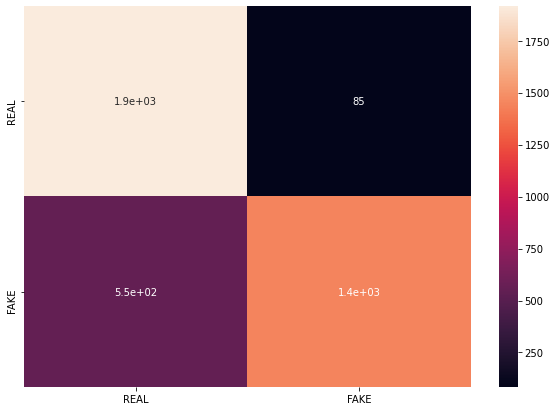

In [50]:
df_cm = pd.DataFrame(cm, index = target_names,
                  columns = target_names)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [51]:
print("Classification report for deepfake classifier:\n%s\n"
      % (classification_report(truth_labels, predicted_labels, target_names=target_names)))

Classification report for deepfake classifier:
              precision    recall  f1-score   support

        REAL       0.78      0.96      0.86      2000
        FAKE       0.94      0.72      0.82      2000

    accuracy                           0.84      4000
   macro avg       0.86      0.84      0.84      4000
weighted avg       0.86      0.84      0.84      4000


